<h2 style="color:Red",align="center" >ML Project-Fraud Transcation Detection</h2>


# Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
#from plotly.offline import iplot
#import plotly as py
#import plotly.tools as tls
#import cufflinks as cf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import warnings


In [2]:
!pip install cassandra-driver

In [3]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
        'secure_connect_bundle': 'C:/Users/krish/Downloads/secure-connect-lovelesh.zip'
}
auth_provider = PlainTextAuthProvider('bXGOCeXqINbxsPtUHCyZpYcS', 'p55Rdfj8emH2Y7WdXWGDhESMLr51d2u6H,T+,e+2N9l9XJhkfiLBQxwCeZY-W6ounly_RIKAigY3FkmFDy+Di0dse-X41C,2SHSf3l_I6t0ZSg9ICbKghXmrlPZb1UU0')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()
session.set_keyspace("jindals")
session.default_fetch_size=None

count=0
results = session.execute("SELECT * FROM creditcard_project ",timeout=None)
for i in results:
    count+=1
    data=pd.DataFrame(results)

In [4]:
data

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1,406,-2.312226542,1.951992011,-1.609850732,3.997905588,-0.522187865,-1.426545319,-2.537387306,1.391657248,...,0.126910559,0.517232371,-0.035049369,-0.465211076,0.320198199,0.044519167,0.177839798,0.261145003,-0.143275875,0
1,1,472,-3.043540624,-3.157307121,1.08846278,2.288643618,1.35980513,-1.064822523,0.325574266,-0.067793653,...,2.102338793,0.661695925,0.435477209,1.375965743,-0.293803153,0.279798032,-0.145361715,-0.252773123,0.035764225,529
2,1,4462,-2.303349568,1.75924746,-0.359744743,2.330243051,-0.821628328,-0.075787571,0.562319782,-0.399146578,...,-0.430021867,-0.294166318,-0.932391057,0.172726296,-0.087329538,-0.156114265,-0.542627889,0.039565989,-0.153028797,239.93
3,1,6986,-4.397974442,1.358367028,-2.592844218,2.679786967,-1.128130942,-1.706536388,-3.496197293,-0.248777743,...,-0.171607879,0.573574068,0.176967718,-0.436206884,-0.053501865,0.252405262,-0.657487755,-0.827135715,0.84957338,59
4,1,7519,1.234235046,3.019740421,-4.304596885,4.73279513,3.624200831,-1.357745663,1.713444988,-0.496358487,...,0.009060836,-0.379068307,-0.704181032,-0.656804756,-1.632652957,1.488901448,0.566797273,-0.010016223,0.146792735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52368,0,45549,1.035919196,-0.004393342,1.312297617,1.310594361,-0.874263824,-0.129115385,-0.490823823,0.102838286,...,-0.039746965,0.183476714,0.54467904,0.021824497,0.407450074,0.230445916,-0.357736211,0.076165563,0.048575593,45
52369,0,45551,-1.984123748,0.193889487,0.560990485,-0.56271154,0.421505708,-0.089439445,0.974425228,0.323494746,...,-0.164882107,-0.440076226,-1.650721654,-0.35250294,-0.849575668,0.187195386,-0.166191886,-0.044172112,-0.32809006,189.95
52370,0,45551,1.112010105,-0.369666273,0.770240434,0.181258556,-1.073855755,-0.67908459,-0.456284711,0.117849059,...,-0.165359768,-0.146159449,-0.611861006,0.215867378,0.383098164,-0.201237669,0.80104724,-0.068827557,0.017192643,47.79
52371,0,45552,-0.810731885,0.405718467,1.166004412,0.174884784,0.719211603,0.129013301,0.563286914,0.251766252,...,-0.386190122,-0.010338023,0.108283085,0.099050624,-0.341723315,0.193710021,-0.516672048,-0.031372691,-0.019112299,5.99


In [5]:
X = data.drop('Class', axis = 1)
Y=data["Class"]

array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'Time'}>]], dtype=object)

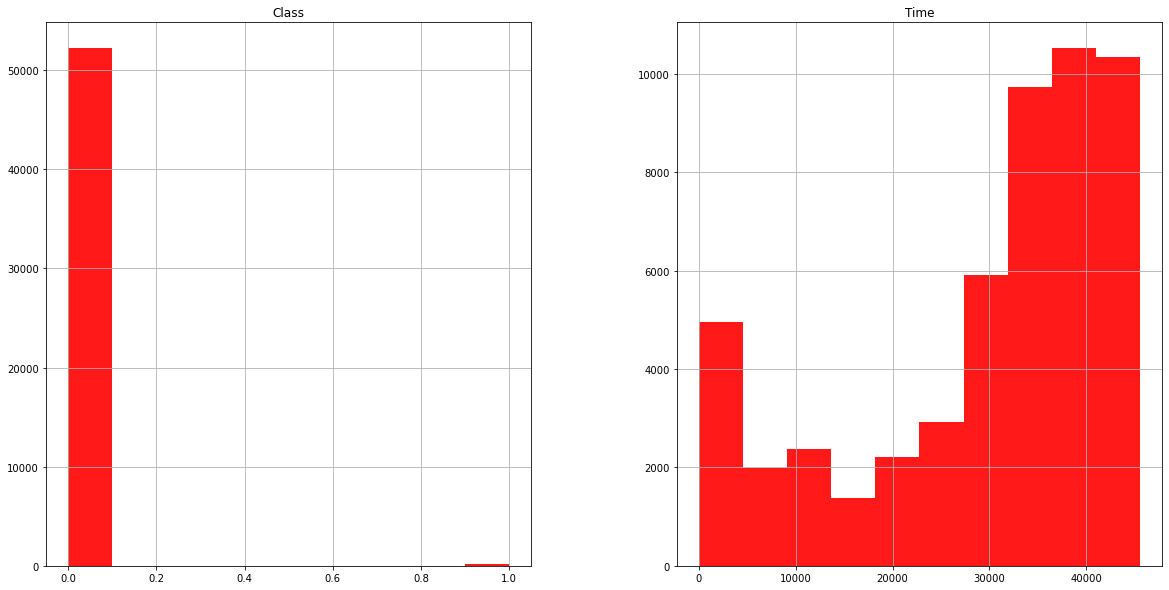

In [6]:
data.hist(figsize= (20,10) , color = 'r' , alpha  = .9)

<AxesSubplot:>

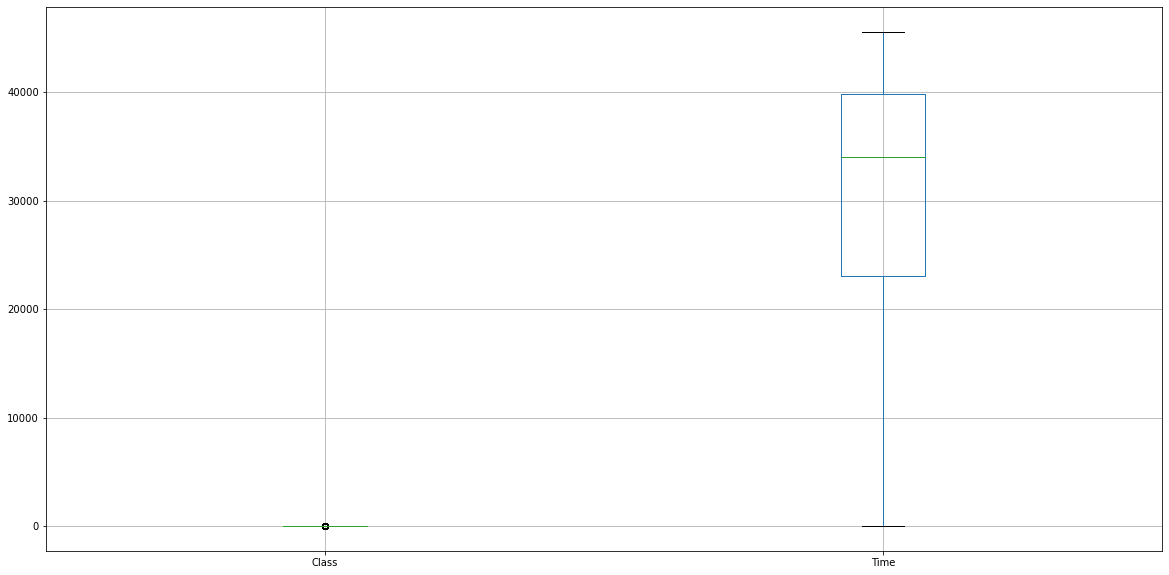

In [7]:
data.boxplot(figsize=(20,10))

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [9]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
10802,18209,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,...,-0.184447934,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,11.85
47403,43274,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,...,-0.935183322,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,188.98
226,49,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,...,0.016970371,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,59.99
2474,1881,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,...,-0.077559623,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,9.99
38028,39263,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,...,-0.397625467,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,19470,-1.865045023,1.965309398,1.229632965,2.531304517,0.483209624,2.086378318,-1.05852632,-1.681669749,-0.320616029,...,-0.619682704,2.3398064,-0.289533481,0.040550365,-1.398297132,0.398435074,0.490810518,0.029415678,-0.04382032,18.66
44732,42133,-0.965844226,0.43069294,1.219603905,-1.711637572,-0.850156954,-1.198097597,-0.104335322,0.37713789,-1.292455806,...,0.091925334,0.19879686,0.282072546,-0.106441447,0.349256001,0.131794161,-0.385884171,0.182827193,0.079187631,24
38158,39319,0.157814887,-2.022074831,0.592289587,0.587850966,-1.264947364,1.069736874,-0.311060856,0.393394447,0.893762873,...,0.796095193,0.156216563,-0.364469933,-0.283238562,-0.207367446,-0.230648411,0.903833656,-0.095279231,0.079634055,482.9
860,539,-1.054584351,0.671513198,2.10671828,-0.59170062,0.228368409,-0.053747659,0.941606072,-0.191062246,0.267565409,...,-0.175150733,-0.049688301,0.137517972,-0.420258772,0.130487916,0.482469027,0.39414256,-0.409756222,-0.179563892,35.64


In [10]:
x_test


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
18983,29923,-0.75811841,1.295159979,0.791737116,-0.139923671,0.166937487,-0.038804415,0.217818159,0.625860812,-0.896646401,...,0.047222413,-0.152804389,-0.485674826,0.021712595,-0.344375574,-0.173098904,0.104640223,0.134931644,0.018556792,8.9
23754,32910,0.670075695,-0.679257541,1.004875118,1.204997521,-0.721223361,0.906347385,-0.556046972,0.426089234,0.230721961,...,0.211712836,0.343179645,0.614590126,-0.133361899,-0.29270272,0.086265115,-0.325115297,0.055334685,0.057204845,200
35791,38305,1.336147774,-0.560169787,-0.419371851,-0.63238216,-0.594134889,-1.029271858,0.01541698,-0.36019405,-1.061968893,...,-0.354434561,-0.359610605,-0.693051553,-0.1438893,-0.074815658,0.490340441,1.142971475,-0.099470715,0.001742465,73.9
24936,33460,1.388597056,-0.540341537,-0.02888982,-0.734390754,-0.736018427,-0.885591237,-0.330427534,-0.264049403,-0.855765398,...,0.155709101,0.201415456,0.433616348,-0.20795166,-0.079808902,0.681282459,-0.089170703,-0.014108223,0.011808604,48.75
38957,39681,1.176251644,0.084788563,0.3358409,0.971092805,-0.336537905,-0.34604704,-0.136826619,0.049569337,0.06965568,...,-0.150343364,0.193314362,0.507646769,-0.21556524,-0.006305693,0.691055654,-0.203481892,0.011313471,0.009698658,22.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18498,29541,0.661111268,-2.224049998,0.230787995,-0.299855004,-1.241449972,1.255178669,-0.884493327,0.244912287,0.492155163,...,0.798349505,0.347515318,0.490280543,-0.622224677,-1.238649665,0.581445025,0.088153528,0.005814369,0.067865818,384
44406,42007,0.907364994,-0.958406761,0.869298387,0.597148366,-1.217432727,0.328937633,-0.688322159,0.172837071,-0.796891,...,-0.242277037,-0.055063701,0.163271685,-0.146595453,0.221874581,0.353261613,-0.239768391,0.065421901,0.04946325,158
10007,14735,-0.497346975,0.741649943,2.292841777,1.67408894,-0.366502813,0.962717786,0.151877638,0.179110294,1.885601269,...,-0.114467418,-0.421505257,-0.48516755,0.053613609,0.037602402,-0.534018744,-0.568002829,0.110319319,0.155418077,47.45
17965,29058,1.235621253,-0.259827309,-0.966019976,-0.599467121,1.820695774,3.388215017,-0.680453158,0.84875236,0.108203793,...,0.105390498,-0.141985979,-0.631511357,0.00374326,1.022093265,0.383579462,0.348156181,-0.032302154,0.018415628,39.9


In [11]:
y_train

10802    0
47403    0
226      0
2474     0
38028    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Class, Length: 39279, dtype: int64

In [12]:
y_test

18983    0
23754    0
35791    0
24936    0
38957    0
        ..
18498    0
44406    0
10007    0
17965    0
52015    0
Name: Class, Length: 13094, dtype: int64

In [13]:
d_train = pd.concat([x_train,y_train], axis =1)
d_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10802,18209,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,...,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,11.85,0
47403,43274,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,...,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,188.98,0
226,49,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,...,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,59.99,0
2474,1881,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,...,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,9.99,0
38028,39263,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,...,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,34.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,19470,-1.865045023,1.965309398,1.229632965,2.531304517,0.483209624,2.086378318,-1.05852632,-1.681669749,-0.320616029,...,2.3398064,-0.289533481,0.040550365,-1.398297132,0.398435074,0.490810518,0.029415678,-0.04382032,18.66,0
44732,42133,-0.965844226,0.43069294,1.219603905,-1.711637572,-0.850156954,-1.198097597,-0.104335322,0.37713789,-1.292455806,...,0.19879686,0.282072546,-0.106441447,0.349256001,0.131794161,-0.385884171,0.182827193,0.079187631,24,0
38158,39319,0.157814887,-2.022074831,0.592289587,0.587850966,-1.264947364,1.069736874,-0.311060856,0.393394447,0.893762873,...,0.156216563,-0.364469933,-0.283238562,-0.207367446,-0.230648411,0.903833656,-0.095279231,0.079634055,482.9,0
860,539,-1.054584351,0.671513198,2.10671828,-0.59170062,0.228368409,-0.053747659,0.941606072,-0.191062246,0.267565409,...,-0.049688301,0.137517972,-0.420258772,0.130487916,0.482469027,0.39414256,-0.409756222,-0.179563892,35.64,0


In [14]:
class0 = d_train[d_train['Class']==0]

class1 = d_train[d_train['Class']==1]

In [15]:
class0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10802,18209,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,...,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,11.85,0
47403,43274,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,...,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,188.98,0
226,49,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,...,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,59.99,0
2474,1881,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,...,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,9.99,0
38028,39263,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,...,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,34.9,0


In [16]:
class0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10802,18209,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,...,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,11.85,0
47403,43274,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,...,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,188.98,0
226,49,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,...,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,59.99,0
2474,1881,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,...,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,9.99,0
38028,39263,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,...,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,34.9,0


In [17]:
frames = ['Time', 'Amount']
x= d_train[frames]
y=d_train.drop(frames, axis=1)

In [18]:
x.head()

,Time,Amount
10802,18209,11.85
47403,43274,188.98
226,49,59.99
2474,1881,9.99
38028,39263,34.9


In [19]:
y.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
10802,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,-1.326315744,...,-0.184447934,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,0
47403,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,-0.034423795,...,-0.935183322,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,0
226,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,-0.57616942,...,0.016970371,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,0
2474,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,-0.048208066,...,-0.077559623,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,0
38028,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,0.384659032,...,-0.397625467,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,0


In [20]:
scaler = StandardScaler()

In [21]:
temp_col=scaler.fit_transform(x)
pd.DataFrame(temp_col)

,0,1
0,-0.871564,-0.326189
1,1.023164,0.370417
2,-2.244325,-0.136867
3,-2.105839,-0.333504
4,0.719962,-0.235540
...,...,...
39274,-0.776242,-0.299407
39275,0.936913,-0.278406
39276,0.724195,1.526329
39277,-2.207284,-0.232629


In [22]:
scaled_col = pd.DataFrame(temp_col, columns=frames)
scaled_col

,Time,Amount
0,-0.871564,-0.326189
1,1.023164,0.370417
2,-2.244325,-0.136867
3,-2.105839,-0.333504
4,0.719962,-0.235540
...,...,...
39274,-0.776242,-0.299407
39275,0.936913,-0.278406
39276,0.724195,1.526329
39277,-2.207284,-0.232629


In [23]:
d_temp = d_train.drop(frames, axis=1)
d_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
10802,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,-1.326315744,...,-0.184447934,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,0
47403,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,-0.034423795,...,-0.935183322,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,0
226,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,-0.57616942,...,0.016970371,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,0
2474,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,-0.048208066,...,-0.077559623,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,0
38028,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,0.384659032,...,-0.397625467,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.865045023,1.965309398,1.229632965,2.531304517,0.483209624,2.086378318,-1.05852632,-1.681669749,-0.320616029,0.432788686,...,-0.619682704,2.3398064,-0.289533481,0.040550365,-1.398297132,0.398435074,0.490810518,0.029415678,-0.04382032,0
44732,-0.965844226,0.43069294,1.219603905,-1.711637572,-0.850156954,-1.198097597,-0.104335322,0.37713789,-1.292455806,-0.081455061,...,0.091925334,0.19879686,0.282072546,-0.106441447,0.349256001,0.131794161,-0.385884171,0.182827193,0.079187631,0
38158,0.157814887,-2.022074831,0.592289587,0.587850966,-1.264947364,1.069736874,-0.311060856,0.393394447,0.893762873,-0.514260465,...,0.796095193,0.156216563,-0.364469933,-0.283238562,-0.207367446,-0.230648411,0.903833656,-0.095279231,0.079634055,0
860,-1.054584351,0.671513198,2.10671828,-0.59170062,0.228368409,-0.053747659,0.941606072,-0.191062246,0.267565409,-0.71242291,...,-0.175150733,-0.049688301,0.137517972,-0.420258772,0.130487916,0.482469027,0.39414256,-0.409756222,-0.179563892,0


In [24]:
d_temp.reset_index()

,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,10802,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,...,-0.184447934,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,0
1,47403,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,...,-0.935183322,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,0
2,226,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,...,0.016970371,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,0
3,2474,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,...,-0.077559623,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,0
4,38028,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,...,-0.397625467,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39274,11284,-1.865045023,1.965309398,1.229632965,2.531304517,0.483209624,2.086378318,-1.05852632,-1.681669749,-0.320616029,...,-0.619682704,2.3398064,-0.289533481,0.040550365,-1.398297132,0.398435074,0.490810518,0.029415678,-0.04382032,0
39275,44732,-0.965844226,0.43069294,1.219603905,-1.711637572,-0.850156954,-1.198097597,-0.104335322,0.37713789,-1.292455806,...,0.091925334,0.19879686,0.282072546,-0.106441447,0.349256001,0.131794161,-0.385884171,0.182827193,0.079187631,0
39276,38158,0.157814887,-2.022074831,0.592289587,0.587850966,-1.264947364,1.069736874,-0.311060856,0.393394447,0.893762873,...,0.796095193,0.156216563,-0.364469933,-0.283238562,-0.207367446,-0.230648411,0.903833656,-0.095279231,0.079634055,0
39277,860,-1.054584351,0.671513198,2.10671828,-0.59170062,0.228368409,-0.053747659,0.941606072,-0.191062246,0.267565409,...,-0.175150733,-0.049688301,0.137517972,-0.420258772,0.130487916,0.482469027,0.39414256,-0.409756222,-0.179563892,0


In [25]:
d_=d_temp.reset_index().drop("index",axis=1)
d_.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,2.852007131,-1.326315744,...,-0.184447934,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,0
1,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,1.656448982,-0.034423795,...,-0.935183322,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,0
2,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,-0.227984855,-0.57616942,...,0.016970371,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,0
3,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,0.57397018,-0.048208066,...,-0.077559623,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,0
4,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,0.378049425,0.384659032,...,-0.397625467,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,0


In [27]:
d_scaled = pd.concat([scaled_col, d_], axis =1)
d_scaled

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.871564,-0.326189,1.128457213,-0.375890194,1.115064304,-0.629260164,-1.014822018,-0.099194583,-0.838242749,0.165207729,...,-0.184447934,-0.065428615,0.273490483,0.010651947,0.183281208,0.337614633,-0.726157657,0.076749304,0.018898241,0
1,1.023164,0.370417,-4.124892975,-3.000976784,1.988953955,-0.128287928,0.828928272,-1.400278253,-0.162366952,-0.239444715,...,-0.935183322,-0.744293306,-0.42081806,0.564837696,0.473552478,0.516302551,0.889462806,0.182402309,0.509170936,0
2,-2.244325,-0.136867,-0.549626145,0.418949154,1.729833252,0.203065374,-0.187012388,0.253877552,0.500893778,0.251255795,...,0.016970371,0.115062466,0.418528728,-0.065132788,0.264980785,0.00395822,0.395968889,0.027182102,0.043505756,0
3,-2.105839,-0.333504,1.131979299,-0.053358842,1.182206969,1.147381248,-0.721791612,0.317189503,-0.632141729,0.227050222,...,-0.077559623,-0.025621787,0.123171519,-0.064669149,0.015585099,0.445927462,-0.407635059,0.071676332,0.0259647,0
4,0.719962,-0.235540,1.204324537,-1.15725097,1.421663528,-0.198517938,-1.709369505,0.711068468,-1.423370926,0.331342681,...,-0.397625467,-0.548108842,-0.69658842,0.011836186,0.074580319,0.161040261,1.029507714,0.016280974,0.012493303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39274,-0.776242,-0.299407,-1.865045023,1.965309398,1.229632965,2.531304517,0.483209624,2.086378318,-1.05852632,-1.681669749,...,-0.619682704,2.3398064,-0.289533481,0.040550365,-1.398297132,0.398435074,0.490810518,0.029415678,-0.04382032,0
39275,0.936913,-0.278406,-0.965844226,0.43069294,1.219603905,-1.711637572,-0.850156954,-1.198097597,-0.104335322,0.37713789,...,0.091925334,0.19879686,0.282072546,-0.106441447,0.349256001,0.131794161,-0.385884171,0.182827193,0.079187631,0
39276,0.724195,1.526329,0.157814887,-2.022074831,0.592289587,0.587850966,-1.264947364,1.069736874,-0.311060856,0.393394447,...,0.796095193,0.156216563,-0.364469933,-0.283238562,-0.207367446,-0.230648411,0.903833656,-0.095279231,0.079634055,0
39277,-2.207284,-0.232629,-1.054584351,0.671513198,2.10671828,-0.59170062,0.228368409,-0.053747659,0.941606072,-0.191062246,...,-0.175150733,-0.049688301,0.137517972,-0.420258772,0.130487916,0.482469027,0.39414256,-0.409756222,-0.179563892,0


In [28]:
X___= d_scaled.drop('Class', axis = 1)
Y___=pd.DataFrame(d_scaled["Class"])
Y___

,Class
0,0
1,0
2,0
3,0
4,0
...,...
39274,0
39275,0
39276,0
39277,0


In [29]:
"""# Dimensionality Reduction"""

from sklearn.decomposition import PCA

pca = PCA(n_components=15)

X_temp_reduced = pca.fit_transform(d_scaled)

In [30]:
X_temp_reduced = pca.fit_transform(X___)
X_reduce=pd.DataFrame(X_temp_reduced)
X_reduce

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.776796,-1.356961,2.471727,2.216553,0.408936,-0.780761,-1.074299,0.082907,-1.235340,0.339836,0.600042,2.055526,-0.293228,-0.216192,-0.018998
1,0.673247,4.570802,1.454107,-2.132409,1.436800,0.163400,-0.888993,1.147355,-0.936967,-0.390091,0.825887,-0.589073,1.445963,0.290622,-0.400440
2,-0.322329,-0.136406,0.603593,-0.367108,-0.484241,0.754657,-0.421748,1.068654,-0.536816,-0.596558,-0.504654,1.071132,-0.983732,0.057315,-0.038300
3,-0.740577,-0.860383,-0.047270,0.671333,0.322736,1.120104,0.082399,0.130192,-0.683907,0.352307,0.041280,0.789271,-0.389097,-1.153948,-1.340595
4,-0.978131,0.400454,-1.401742,1.030218,0.538572,0.447862,-0.220571,1.177243,-2.756067,0.966620,-0.819550,0.194546,-0.025810,-2.342933,-0.490256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39274,0.955834,-1.535844,3.214441,-0.538237,-1.232099,1.156117,2.159701,-0.149599,1.281623,2.098416,-1.046155,-1.480764,-1.869375,0.033378,-0.660902
39275,0.189698,0.209026,-0.976111,-1.121223,-0.031411,-1.710243,-1.596188,-0.062473,-0.174237,-0.671088,-0.285619,-1.755102,-0.165300,1.281305,0.054805
39276,-0.257622,2.150501,-1.022846,1.909315,-0.054166,0.767242,0.206457,0.369863,-1.102050,0.337809,-0.219276,1.751633,0.001923,-0.173336,0.166821
39277,-0.510859,-0.003106,0.989453,-1.081261,-0.724264,0.227760,-0.601640,1.724922,-0.410028,-0.964517,0.701503,-0.327157,-0.120424,-0.156090,0.560179


In [31]:
pca.explained_variance_ratio_

array([0.14680234, 0.09954641, 0.08200826, 0.07203278, 0.06180744,
       0.05396926, 0.05153164, 0.04491742, 0.04092028, 0.03579356,
       0.03133233, 0.03079729, 0.02998401, 0.02760004, 0.02210625])

In [32]:
pca.explained_variance_

array([5.14302766, 3.48747834, 2.87305212, 2.5235741 , 2.16534281,
       1.89074256, 1.80534346, 1.57362313, 1.43358843, 1.25398061,
       1.09768734, 1.07894264, 1.05045043, 0.96693138, 0.77446364])

In [33]:
new_data=pd.concat([X_reduce,Y___],axis=1)
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,-0.776796,-1.356961,2.471727,2.216553,0.408936,-0.780761,-1.074299,0.082907,-1.235340,0.339836,0.600042,2.055526,-0.293228,-0.216192,-0.018998,0
1,0.673247,4.570802,1.454107,-2.132409,1.436800,0.163400,-0.888993,1.147355,-0.936967,-0.390091,0.825887,-0.589073,1.445963,0.290622,-0.400440,0
2,-0.322329,-0.136406,0.603593,-0.367108,-0.484241,0.754657,-0.421748,1.068654,-0.536816,-0.596558,-0.504654,1.071132,-0.983732,0.057315,-0.038300,0
3,-0.740577,-0.860383,-0.047270,0.671333,0.322736,1.120104,0.082399,0.130192,-0.683907,0.352307,0.041280,0.789271,-0.389097,-1.153948,-1.340595,0
4,-0.978131,0.400454,-1.401742,1.030218,0.538572,0.447862,-0.220571,1.177243,-2.756067,0.966620,-0.819550,0.194546,-0.025810,-2.342933,-0.490256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39274,0.955834,-1.535844,3.214441,-0.538237,-1.232099,1.156117,2.159701,-0.149599,1.281623,2.098416,-1.046155,-1.480764,-1.869375,0.033378,-0.660902,0
39275,0.189698,0.209026,-0.976111,-1.121223,-0.031411,-1.710243,-1.596188,-0.062473,-0.174237,-0.671088,-0.285619,-1.755102,-0.165300,1.281305,0.054805,0
39276,-0.257622,2.150501,-1.022846,1.909315,-0.054166,0.767242,0.206457,0.369863,-1.102050,0.337809,-0.219276,1.751633,0.001923,-0.173336,0.166821,0
39277,-0.510859,-0.003106,0.989453,-1.081261,-0.724264,0.227760,-0.601640,1.724922,-0.410028,-0.964517,0.701503,-0.327157,-0.120424,-0.156090,0.560179,0


In [34]:
new_data.to_csv('final_data.csv')

In [35]:
X_train, X_test, y_train, y_test= train_test_split(x,y['Class'], test_size = 0.25, random_state = 42)

In [36]:
print(X_train.shape)
print(X_test.shape)

(29459, 2)
(9820, 2)


In [37]:
print(y_train.shape)
print(y_test.shape)

(29459,)
(9820,)


Text(0, 0.5, 'Frequency')

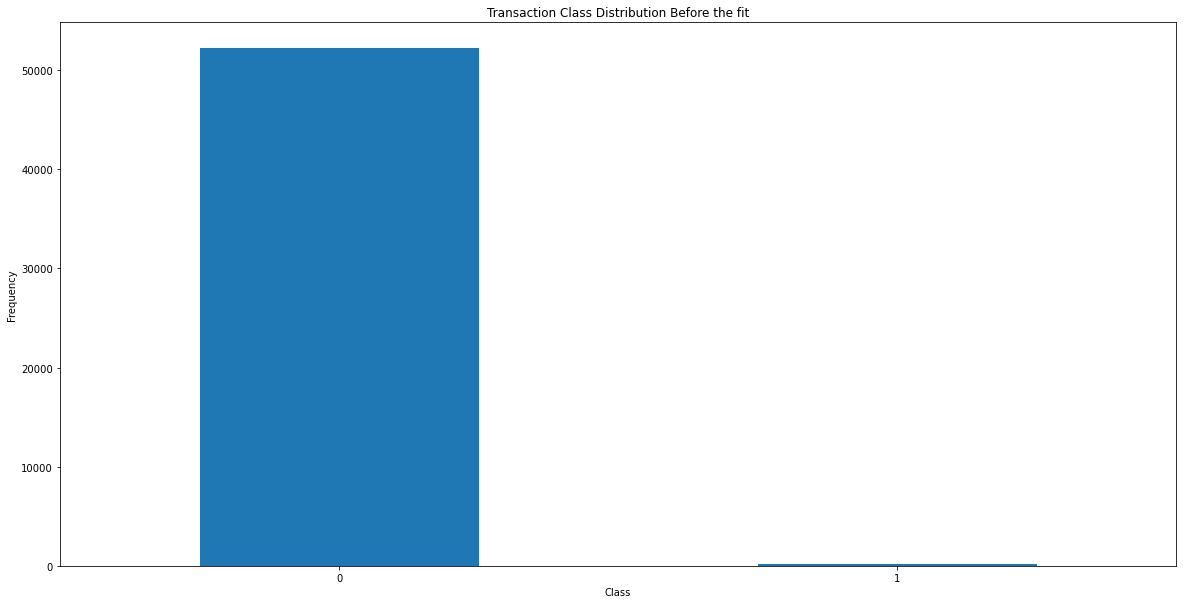

In [38]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0,figsize=(20,10))

plt.title("Transaction Class Distribution Before the fit")

plt.xlabel("Class")

plt.ylabel("Frequency")


In [39]:
!pip install --user imblearn

In [40]:
print(y_train.value_counts())
print(y_test.value_counts())

0    29367
1       92
Name: Class, dtype: int64
0    9791
1      29
Name: Class, dtype: int64


In [41]:
from collections import Counter 
Counter(y_train)

Counter({0: 29367, 1: 92})

# SMOTE (Synthetic Minority Oversampling Technique) – Oversampling

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(0.7,random_state = 42)

C:\Users\krish\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [43]:
X_train_Smote, Y_train_Smote=sm.fit_resample(X_train,y_train)

In [44]:
X_train_Smote

,Time,Amount
0,40138,2849.94
1,29910,14.98
2,13820,65.05
3,37988,722.36
4,36042,24.76
...,...,...
49918,41198,43.2243
49919,7633,1
49920,7551,1
49921,11102,1


In [45]:
d_smote = pd.concat([X_train_Smote,Y_train_Smote], axis =1)
d_smote

,Time,Amount,Class
0,40138,2849.94,0
1,29910,14.98,0
2,13820,65.05,0
3,37988,722.36,0
4,36042,24.76,0
...,...,...,...
49918,41198,43.2243,1
49919,7633,1,1
49920,7551,1,1
49921,11102,1,1


In [46]:
print("The Number of classes Before the fit {}".format(Counter(y_train)))
print("The Number of classes After the fit {}".format(Counter(Y_train_Smote)))

The Number of classes Before the fit Counter({0: 29367, 1: 92})
The Number of classes After the fit Counter({0: 29367, 1: 20556})


In [47]:
class0_ = d_smote[d_smote['Class']==0]
class0_

,Time,Amount,Class
0,40138,2849.94,0
1,29910,14.98,0
2,13820,65.05,0
3,37988,722.36,0
4,36042,24.76,0
...,...,...,...
29454,31579,1,0
29455,26840,608.79,0
29456,36772,935.95,0
29457,2090,487.94,0


In [48]:
class1_ = d_smote[d_smote['Class']==1]
class1_.tail(n=20)

,Time,Amount,Class
49903,36378,90.9448,1
49904,41221,0.457442,1
49905,35899,1.56761,1
49906,41193,2.43295,1
49907,17592,50.2772,1
49908,34766,116.902,1
49909,28658,99.99,1
49910,17819,742.727,1
49911,41046,70.1671,1
49912,41157,44.3493,1


Text(0, 0.5, 'Frequency')

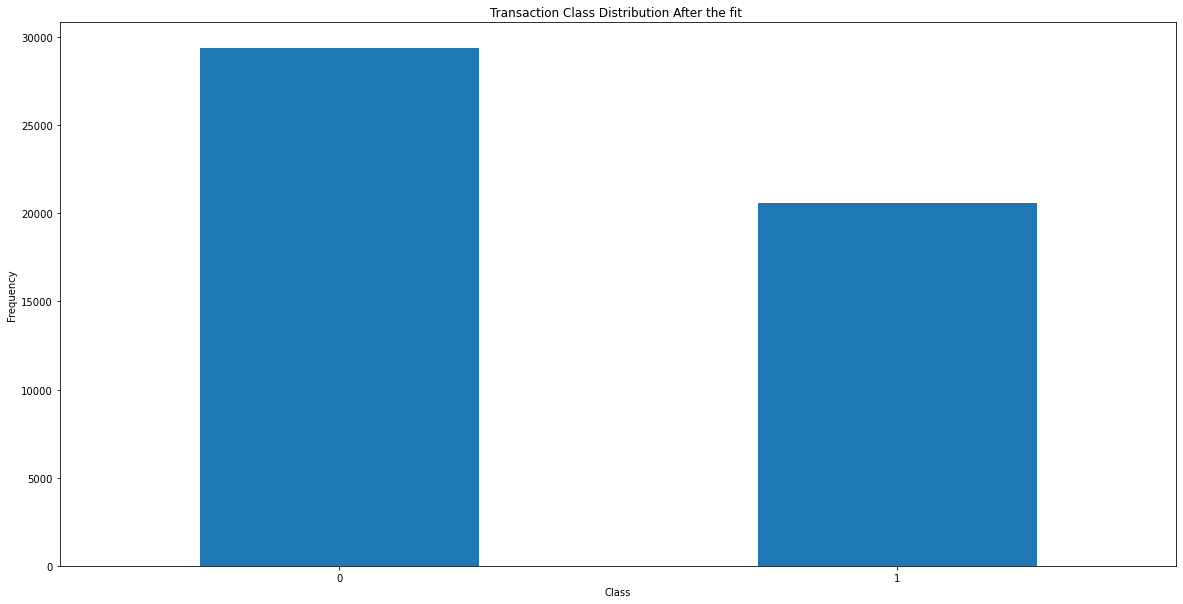

In [49]:
count_classes = pd.value_counts(d_smote['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0,figsize=(20,10))

plt.title("Transaction Class Distribution After the fit ")

plt.xlabel("Class")

plt.ylabel("Frequency")


# RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_SMOTE = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_SMOTE

RandomForestClassifier(n_estimators=20)

In [51]:
rf_SMOTE.fit(X_train_Smote, Y_train_Smote)

RandomForestClassifier(n_estimators=20)

In [52]:
y_pred_regressor_rf1 = rf_SMOTE.predict(X_test)
y_pred_regressor_rf1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
RF_Accuracy_SMOTE = rf_SMOTE.score(X_test,y_test)
RF_Accuracy_SMOTE

0.9406313645621182

In [54]:
cm_regressor_rf1 = confusion_matrix(y_test, y_pred_regressor_rf1)
print(cm_regressor_rf1)
print("Accuracy score of the model:",accuracy_score(y_test, y_pred_regressor_rf1))
print(classification_report(y_test, y_pred_regressor_rf1))

[[9222  569]
 [  14   15]]
Accuracy score of the model: 0.9406313645621182
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      9791
           1       0.03      0.52      0.05        29

    accuracy                           0.94      9820
   macro avg       0.51      0.73      0.51      9820
weighted avg       1.00      0.94      0.97      9820



In [55]:
import pickle

In [58]:
file = open('Fraud_Transaction_Detection_.pkl', 'wb')
pickle.dump(rf_SMOTE, file)

In [59]:
f = pd.read_pickle(r'Fraud_Transaction_Detection_.pkl')
f

RandomForestClassifier(n_estimators=20)